In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Changing the settings for our pandas dataframes to display up to 100 columns, and 100 rows

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
# Loading the dataset to a variable called data
filename = "/Users/alex/desktop/python_work/data-sets/fifa_data.csv"
data = pd.read_csv(filename)

## The goal of this project is to use Machine Learning Techniques to build the fastest, best overall starting U_21 team

To preface I want to build a team predicated on speed of the best players that are 21 years old or younger.
For my team I want to choose the best players in the following positions:
1 ST, 1 LW, 1 RW, 1 LM, 1 RM, 1 CDM, 1 RB, 1 LB, 2 CB, 1 GK

In [4]:
# Creating a new dataframe named u_21 using a copy of the data dataframe

u_21 = data.copy()
u_21 = u_21[u_21['Age'] <= 21]

In [5]:
u_21.head()

Unnamed: 0      ID           Name  Age                                           Photo  Nationality                                 Flag  Overall  Potential                 Club                                     Club Logo   Value   Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate Body Type Real Face Position  Jersey Number        Joined  \
25           25  231747      K. Mbappé   19  https://cdn.sofifa.org/players/4/19/231747.png       France  https://cdn.sofifa.org/flags/18.png       88         95  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png    €81M  €100K     2118          Right                       3.0        4.0          5.0    High/ Medium      Lean       Yes       RM           10.0   Jul 1, 2018   
155         155  231443     O. Dembélé   21  https://cdn.sofifa.org/players/4/19/231443.png       France  https://cdn.sofifa.org/flags/18.png       83         92         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png    €40M  €155K     1993           Left                       3.0        5.0          4.0       High/ Low      Lean       Yes       RW           11.0  Aug 28, 2017   
156         156  230666  Gabriel Jesus   21  https://cdn.sofifa.org/players/4/19/230666.png       Brazil  https://cdn.sofifa.org/flags/54.png       83         92      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €41M  €130K     2051          Right                       2.0        3.0          4.0      High/ High    Normal       Yes       ST           33.0   Aug 3, 2016   
226         226  235243     M. de Ligt   18  https://cdn.sofifa.org/players/4/19/235243.png  Netherlands  https://cdn.sofifa.org/flags/34.png       82         91                 Ajax  https://cdn.sofifa.org/teams/2/light/245.png    €27M   €11K     1937          Right                       2.0        4.0          2.0  Medium/ Medium    Normal       Yes      RCB            3.0  Oct 24, 2016   
228         228  230658         Arthur   21  https://cdn.sofifa.org/players/4/19/230658.png       Brazil  https://cdn.sofifa.org/flags/54.png       82         90         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €32.5M  €125K     2120          Right                       1.0        3.0          4.0  Medium/ Medium    Normal        No      LCM            8.0   Jul 9, 2018   

    Loaned From Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  \
25          NaN                 2022   5'10  161lbs  85+3  85+3  85+3  87+3  87+3  87+3  87+3  87+3  86+3  86+3  86+3  86+3  78+3  78+3  78+3  86+3  66+3  62+3  62+3  62+3  66+3  62+3  54+3  54+3  54+3  62+3      77.0       88.0             77.0          82.0     78.0       90.0   77.0        63.0         73.0         91.0          96.0         96.0     92.0       87.0     83.0       79.0   
155         NaN                 2022   5'10  148lbs  76+3  76+3  76+3  83+3  82+3  82+3  82+3  83+3  82+3  82+3  82+3  82+3  74+3  74+3  74+3  82+3  63+3  58+3  58+3  58+3  63+3  59+3  46+3  46+3  46+3  59+3      78.0       78.0             43.0          78.0     76.0       90.0   78.0        64.0         70.0         83.0          93.0         92.0     90.0       82.0     85.0       83.0   
156         NaN                 2023    5'9  161lbs  81+2  81+2  81+2  82+2  83+2  83+2  83+2  82+2  81+2  81+2  81+2  81+2  73+2  73+2  73+2  81+2  61+2  59+2  59+2  59+2  61+2  57+2  52+2  52+2  52+2  57+2      66.0       84.0             74.0          76.0     72.0       86.0   76.0        54.0         66.0         85.0          87.0         85.0     92.0       86.0     91.0       78.0   
226         NaN                 2021    6'2  196lbs  6

In [6]:
# Off the bat I see from looking at the dataframe that there are a bunch of categories that are not relevant
# to us, so I will remove them

u_21.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club', 'Club Logo', 'Special', 'International Reputation', 
        'Body Type', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until', 'Release Clause'], 
        axis=1, inplace=True)

In [7]:
u_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 25 to 18206
Data columns (total 76 columns):
ID                 4750 non-null int64
Name               4750 non-null object
Age                4750 non-null int64
Nationality        4750 non-null object
Overall            4750 non-null int64
Potential          4750 non-null int64
Value              4750 non-null object
Wage               4750 non-null object
Preferred Foot     4740 non-null object
Weak Foot          4740 non-null float64
Skill Moves        4740 non-null float64
Work Rate          4740 non-null object
Position           4738 non-null object
Jersey Number      4738 non-null float64
Height             4740 non-null object
Weight             4740 non-null object
LS                 4248 non-null object
ST                 4248 non-null object
RS                 4248 non-null object
LW                 4248 non-null object
LF                 4248 non-null object
CF                 4248 non-null object
RF          

In [8]:
# Let's see what the percentage of null values is for each feature

100 * u_21.isnull().sum() / len(u_21)

ID                  0.000000
Name                0.000000
Age                 0.000000
Nationality         0.000000
Overall             0.000000
Potential           0.000000
Value               0.000000
Wage                0.000000
Preferred Foot      0.210526
Weak Foot           0.210526
Skill Moves         0.210526
Work Rate           0.210526
Position            0.252632
Jersey Number       0.252632
Height              0.210526
Weight              0.210526
LS                 10.568421
ST                 10.568421
RS                 10.568421
LW                 10.568421
LF                 10.568421
CF                 10.568421
RF                 10.568421
RW                 10.568421
LAM                10.568421
CAM                10.568421
RAM                10.568421
LM                 10.568421
LCM                10.568421
CM                 10.568421
RCM                10.568421
RM                 10.568421
LWB                10.568421
LDM                10.568421
CDM           

In [9]:
# Checking to see which players have NaN value for the 'LS' feature

u_21[u_21['LS'].isnull()]

ID                 Name  Age          Nationality  Overall  Potential   Value  Wage Preferred Foot  Weak Foot  Skill Moves       Work Rate Position  Jersey Number Height  Weight   LS   ST   RS   LW   LF   CF   RF   RW  LAM  CAM  RAM   LM  LCM   CM  RCM   RM  LWB  LDM  CDM  RDM  RWB   LB  LCB   CB  RCB   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
229    230621        G. Donnarumma   19                Italy       82         93    €29M  €23K          Right        3.0          1.0  Medium/ Medium       GK           22.0    6'5  198lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      12.0       12.0             12.0          34.0      8.0       28.0   12.0   
734    231691            A. Lafont   19               France       78         90    €14M  €12K          Right        3.0          1.0  Medium/ Medium       GK            1.0    6'4  181lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      13.0        6.0             13.0          54.0      9.0       14.0   13.0   
1544   243952             A. Lunin   19              Ukraine       76         88  €10.5M  €24K          Right        3.0          1.0  Medium/ Medium       GK           29.0    6'3  176lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      15.0        8.0             12.0          25.0     12.0       11.0   14.0   
1763   225116             A. Meret   21                Italy       75         89    €12M  €24K           Left        2.0          1.0  Medium/ Medium       GK            1.0    6'3  183lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      15.0       17.0             19.0          29.0     20.0       16.0   20.0   
2742   228413            E. Audero   21                Italy       73         85   €5.5M  €30K          Right        2.0          1.0  Medium/ Medium       GK            1.0    6'3  176lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      13.0       16.0             19.0          29.0     18.0       19.0   12.0   
2914   228736           W. Faríñez   20            Venezuela       73         83     €5M   €2K          Right        3.0          1.0  Medium/ Medium       GK            1.0   5'11  179lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      18.0       20.0             17.0          24.0     15.0       14.0   22.0   
3335   232229            J. Bijlow   20          Netherlands       72         82   €3.9M   €5K          Right        2.0          1.0  Medium/ Medium       GK           22.0    6'3  161lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      10.0       10.0             11.0          33.0     10.0       11.0   10.0   
3466   243538            K. Letica   21              Croatia       72         80   €3.5M   €8K          Right        3.0          1.0  Medium/ Medium       GK            1.0    6'7  212lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      13.0        5.0             10.0          29.0      9.0       14.0   13.0   
3489   233306         D. Henderson   21              England       72         83   €4.2M  €31K          Right        3.0          1.0  Medium/ Medium       GK            1.0    6'3  187lbs  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      14.0        9.0             13.0          32.0      5.0       13.0   13.0   
3

In [10]:
# It looks like a majority of the features with null values have less than 1% of null values in total.
# The remaining features have 11% of their values as null values. Upon further investigation it looks like
# the NaN values are for GoalKeepers, I will create a new dataframe just for GoalKeepers and remove them from this
# data set.

u_21_gk = u_21.copy()
u_21_gk = u_21_gk[u_21_gk['Position'] == 'GK']

u_21.dropna(axis=0, inplace=True)

In [11]:
# I want to create some dummy variables for some features that I would like to feed to a model that I will build
work_rate_dummies = data['Work Rate'].map({'Low/Low': 1, 'Low/ Medium': 2, 'Low/ High': 3, 'Medium/ Low': 4,
                                      'Medium/ Medium': 5, 'Medium/ High': 6, 'High/ Low': 7, 'High/ Medium': 8,
                                      'High/ High': 9})

preferred_foot = pd.get_dummies(u_21['Preferred Foot'], drop_first=True)

u_21['Work Rate'] = work_rate_dummies
u_21 = pd.concat([u_21.drop('Preferred Foot', axis=1), preferred_foot], axis=1)

In [12]:
# Renaming the Column 'Right' to 'right_footed'
# 1 is yes, and 0 is no

u_21.rename(columns={'Right': 'right_footed'}, inplace=True)

In [13]:
# I want to remove lbs from the Weight column so I can conver the feature to a numeric data type

u_21['Weight'] = u_21['Weight'].apply(lambda x: x[:3])
u_21['Weight'] = pd.to_numeric(u_21['Weight'])

In [14]:
# I also want to convert the Height feature to a numeric value. It may be unconventional but, I want to remove the ' 
# apostrophe and replace it with a decimal. So 5'7 would become 5.7

u_21['Height'] = u_21['Height'].apply(lambda x: x.replace("'", '.'))
u_21['Height'] = pd.to_numeric(u_21['Height'])

In [15]:
# I want to convert all the positional overall columns we need for our team to numerical values. 
# I am going to write a function that would convert them to numbers. An example is converting 85+3 to 88, 
# and make it an int value.

def convert_to_number(num):
    num_1 = num.split('+')[0]
    num_2 = num.split('+')[1]
    return int(num_1) + int(num_2)

In [16]:
# Converting the columns to numbers

u_21['ST'] = u_21['ST'].apply(convert_to_number)
u_21['LW'] = u_21['LW'].apply(convert_to_number)
u_21['RW'] = u_21['RW'].apply(convert_to_number)
u_21['LAM'] = u_21['LAM'].apply(convert_to_number)
u_21['RAM'] = u_21['RAM'].apply(convert_to_number)
u_21['LM'] = u_21['LM'].apply(convert_to_number)
u_21['LCM'] = u_21['LCM'].apply(convert_to_number)
u_21['RCM'] = u_21['RCM'].apply(convert_to_number)
u_21['RM'] = u_21['RM'].apply(convert_to_number)
u_21['CDM'] = u_21['CDM'].apply(convert_to_number)
u_21['LB'] = u_21['LB'].apply(convert_to_number)
u_21['CB'] = u_21['CB'].apply(convert_to_number)
u_21['RB'] = u_21['RB'].apply(convert_to_number)

In [17]:
# Removing the additional columns I decided that I don't need

u_21.drop(['LS', 'RS', 'LF', 'CF', 'RF', 'CM', 'CAM', 'LWB', 'LDM', 'RDM', 'RWB', 'RCB', 'LCB', 'GKDiving', 'GKHandling',
          'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [18]:
# Since I want my team to be the fastest team possible, I am going to filter out players who have a sprint speed 
# lower than a 70.

u_21 = u_21[u_21['SprintSpeed'] >=70]

In [19]:
# Checking to see if we have all the positions we want in our updated dataframe

u_21['Position'].unique()

array(['RM', 'RW', 'ST', 'RCB', 'LCM', 'LM', 'LW', 'LDM', 'CAM', 'CM',
       'RS', 'LCB', 'LB', 'LS', 'RB', 'CB', 'RWB', 'RCM', 'CDM', 'CF',
       'RDM', 'RF', 'LWB', 'LF', 'LAM'], dtype=object)

In [20]:
u_21.head(2)

ID        Name  Age Nationality  Overall  Potential Value   Wage  Weak Foot  Skill Moves  Work Rate Position  Jersey Number  Height  Weight  ST  LW  RW  LAM  RAM  LM  LCM  RCM  RM  CDM  LB  CB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  \
25   231747   K. Mbappé   19      France       88         95  €81M  €100K        4.0          5.0        8.0       RM           10.0     5.1     161  88  90  90   89   89  89   81   81  89   65  65  57  65      77.0       88.0             77.0          82.0     78.0       90.0   77.0        63.0         73.0         91.0          96.0         96.0     92.0       87.0     83.0       79.0   
155  231443  O. Dembélé   21      France       83         92  €40M  €155K        5.0          4.0        7.0       RW           11.0     5.1     148  79  86  86   85   85  85   77   77  85   61  62  49  62      78.0       78.0             43.0          78.0     76.0       90.0   78.0        64.0         70.0         83.0          93.0         92.0     90.0       82.0     85.0       83.0   

     Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  right_footed  
25      75.0     83.0      71.0       78.0        62.0           38.0         88.0    82.0       70.0       86.0     34.0            34.0           32.0             1  
155     59.0     73.0      46.0       70.0        54.0           36.0         79.0    84.0       75.0       75.0     42.0            30.0           33.0             0

In [21]:
# Before I get to EDA I want to clean up the u_21_gk dataframe

# Dropping the uneccesary columns
u_21_gk.drop(u_21_gk.columns[16:42], axis=1, inplace=True)
u_21_gk.drop(['Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys', 'Dribbling', 'Curve', 
             'FKAccuracy', 'BallControl', 'ShotPower', 'Stamina', 'LongShots',
             'Aggression', 'Interceptions', 'Positioning', 'Penalties', 'Marking',
             'StandingTackle', 'SlidingTackle'], axis=1, inplace=True)

# Converting the work rate and preferred rate features to dummies
work_rate_dummies = u_21_gk['Work Rate'].map({'Low/Low': 1, 'Low/ Medium': 2, 'Low/ High': 3, 'Medium/ Low': 4,
                                      'Medium/ Medium': 5, 'Medium/ High': 6, 'High/ Low': 7, 'High/ Medium': 8,
                                      'High/ High': 9})

preferred_foot = pd.get_dummies(u_21_gk['Preferred Foot'], drop_first=True)

u_21_gk['Work Rate'] = work_rate_dummies
u_21_gk = pd.concat([u_21_gk.drop('Preferred Foot', axis=1), preferred_foot], axis=1)

# Converting the Weight and Height features
u_21_gk['Weight'] = u_21_gk['Weight'].apply(lambda x: x[:3])
u_21_gk['Weight'] = pd.to_numeric(u_21_gk['Weight'])

u_21_gk['Height'] = u_21_gk['Height'].apply(lambda x: x.replace("'", '.'))
u_21_gk['Height'] = pd.to_numeric(u_21_gk['Height'])

# Changing the name of the right footed column from Right to right_footed
u_21_gk.rename(columns={'Right': 'right_footed'}, inplace=True)

In [22]:
u_21_gk.head(3)

ID           Name  Age Nationality  Overall  Potential   Value  Wage  Weak Foot  Skill Moves  Work Rate Position  Jersey Number  Height  Weight  ShortPassing  LongPassing  Acceleration  SprintSpeed  Agility  Reactions  Balance  Jumping  Strength  Vision  Composure  GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  right_footed
229   230621  G. Donnarumma   19       Italy       82         93    €29M  €23K        3.0          1.0          5       GK           22.0     6.5     198          34.0         24.0          46.0         54.0     64.0       74.0     38.0     72.0      72.0    50.0       68.0      88.0        78.0       72.0           78.0        88.0             1
734   231691      A. Lafont   19      France       78         90    €14M  €12K        3.0          1.0          5       GK            1.0     6.4     181          54.0         38.0          48.0         45.0     55.0       69.0     53.0     73.0      70.0    47.0       59.0      79.0        77.0       71.0           76.0        80.0             1
1544  243952       A. Lunin   19     Ukraine       76         88  €10.5M  €24K        3.0          1.0          5       GK           29.0     6.3     176          25.0         26.0          33.0         26.0     36.0       76.0     22.0     56.0      61.0    60.0       56.0      74.0        71.0       76.0           77.0        79.0             1

## Exploratory Data Analysis

Things to explore
- Most frequent jersey Number
- Overall vs. Sprint Speed
- Age count plot
- Weak Foot countplot
- Work rate countplot
- Height and Weight Distribution
- Overall Distribution 
- Jointplots between similar attributes
- Countplot of preferred foot
- Boxplot of Overall with Age as a hue

In [23]:
sns.set_style('darkgrid')

Text(0.5,1,'Distribution of Overall Rating')

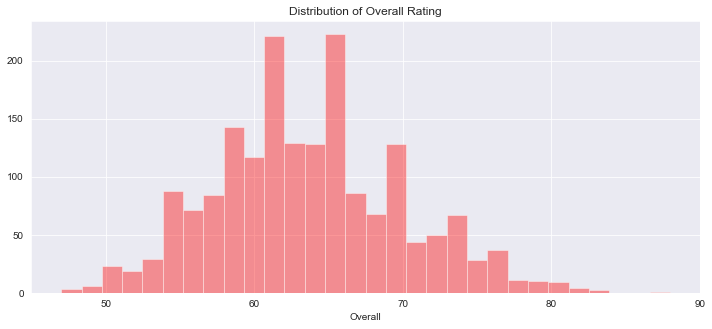

In [24]:
# Distribution of Overalls

plt.figure(figsize=(12, 5))
sns.distplot(u_21['Overall'], bins=30, kde=False, color='red')
plt.title('Distribution of Overall Rating')

Text(0.5,1,'Distribution of Sprint Speed')

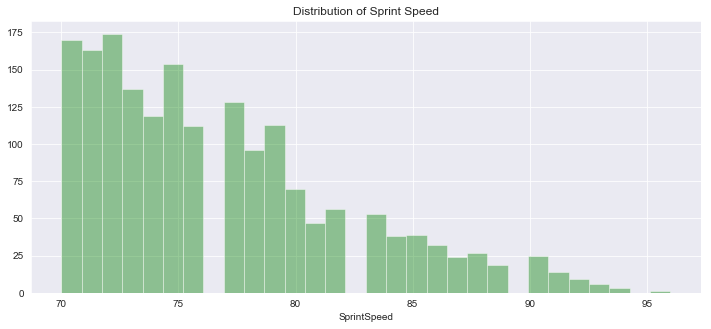

In [25]:
# Distribution of Sprint Speeds

plt.figure(figsize=(12, 5))
sns.distplot(u_21['SprintSpeed'], kde=False, color='green', bins=30)
plt.title('Distribution of Sprint Speed')

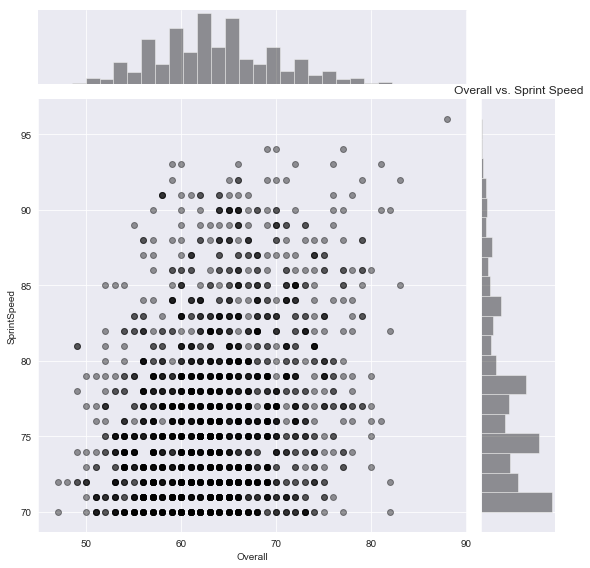

In [26]:
# Joinplot comparing the distribution of Overalls with the distribution of Sprint Speeds

sns.jointplot(x='Overall', y='SprintSpeed', data=u_21, ratio=5, height=8, alpha=0.4, color='black')
plt.title('Overall vs. Sprint Speed')
plt.show()

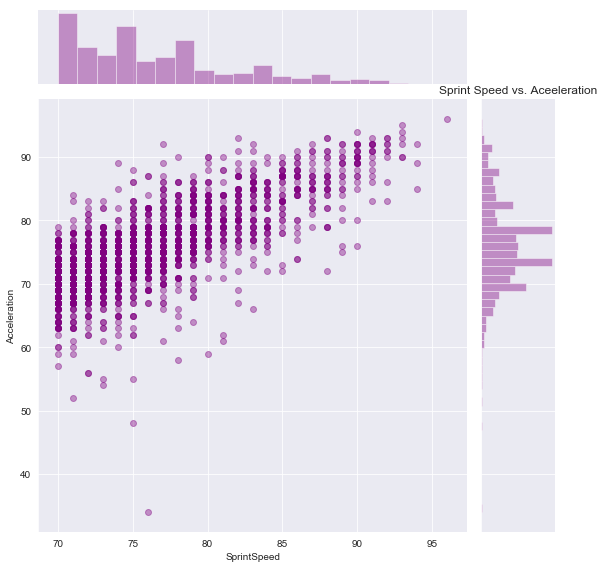

In [27]:
# Comparing Sprint Speed with Acceleratin to see if there's a relationship between the two

sns.jointplot(x='SprintSpeed', y='Acceleration', data=u_21, ratio=5, height=8, alpha=0.4, color='purple')
plt.title('Sprint Speed vs. Aceeleration')
plt.show()

In [28]:
u_21.head()

ID           Name  Age  Nationality  Overall  Potential   Value   Wage  Weak Foot  Skill Moves  Work Rate Position  Jersey Number  Height  Weight  ST  LW  RW  LAM  RAM  LM  LCM  RCM  RM  CDM  LB  CB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  \
25   231747      K. Mbappé   19       France       88         95    €81M  €100K        4.0          5.0        8.0       RM           10.0     5.1     161  88  90  90   89   89  89   81   81  89   65  65  57  65      77.0       88.0             77.0          82.0     78.0       90.0   77.0        63.0         73.0         91.0          96.0         96.0     92.0       87.0     83.0       79.0   
155  231443     O. Dembélé   21       France       83         92    €40M  €155K        5.0          4.0        7.0       RW           11.0     5.1     148  79  86  86   85   85  85   77   77  85   61  62  49  62      78.0       78.0             43.0          78.0     76.0       90.0   78.0        64.0         70.0         83.0          93.0         92.0     90.0       82.0     85.0       83.0   
156  230666  Gabriel Jesus   21       Brazil       83         92    €41M  €130K        3.0          4.0        9.0       ST           33.0     5.9     161  83  84  84   83   83  83   75   75  83   61  59  54  59      66.0       84.0             74.0          76.0     72.0       86.0   76.0        54.0         66.0         85.0          87.0         85.0     92.0       86.0     91.0       78.0   
226  235243     M. de Ligt   18  Netherlands       82         91    €27M   €11K        4.0          2.0        5.0      RCB            3.0     6.2     196  68  65  65   67   67  67   72   72  67   79  77  82  77      57.0       53.0             81.0          75.0     40.0       65.0   48.0        55.0         72.0         73.0          62.0         72.0     56.0       77.0     59.0       79.0   
228  230658         Arthur   21       Brazil       82         90  €32.5M  €125K        3.0          4.0        5.0      LCM            8.0     5.7     161  75  79  79   81   81  80   82   82  80   78  75  73  75      70.0       72.0             58.0          85.0     63.0       82.0   68.0        60.0         80.0         83.0          68.0         70.0     79.0       81.0     86.0       76.0   

     Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  right_footed  
25      75.0     83.0      71.0       78.0        62.0           38.0         88.0    82.0       70.0       86.0     34.0            34.0           32.0             1  
155     59.0     73.0      46.0       70.0        54.0           36.0         79.0    84.0       75.0       75.0     42.0            30.0           33.0             0  
156     77.0     84.0      68.0       73.0        73.0           32.0         88.0    77.0       78.0       82.0     53.0            23.0           19.0             1  
226     80.0     74.0      87.0       64.0        79.0           79.0         44.0    63.0       40.0       77.0     84.0            84.0           79.0             1  
228     83.0     78.0      62.0       74.0        73.0           75.0         77.0    82.0       69.0       84.0     65.0            76.0           70.0             1

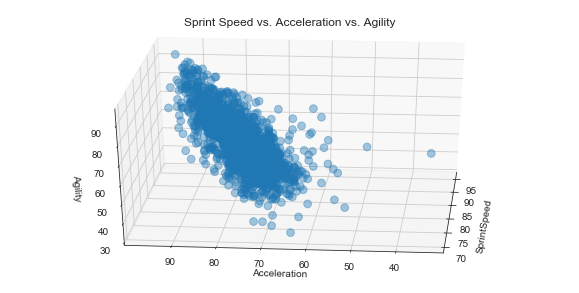

In [29]:
# Since I see a linear relationship between SprintSpeed and Acceleration I want to plot a 3D plot to see if there's
# also a linear relationship between Agility, SprintSpeed, and Acceleration
from mpl_toolkits.mplot3d import Axes3D
sns.set_style('white')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u_21['SprintSpeed'], u_21['Acceleration'], u_21['Agility'], alpha=0.4, s=60)
ax.view_init(30, 185)
ax.set_xlabel('SprintSpeed')
ax.set_ylabel('Acceleration')
ax.set_zlabel('Agility')
ax.set_title('Sprint Speed vs. Acceleration vs. Agility')
plt.show()

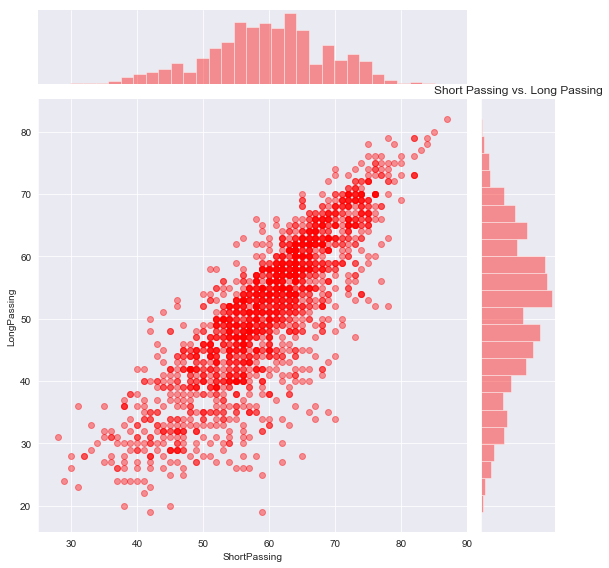

In [30]:
# Looking at a jointplot comparing short passing with long passing

sns.set_style('darkgrid')

sns.jointplot(x='ShortPassing', y='LongPassing', data=u_21, height=8, color='red', alpha=0.4)
plt.title('Short Passing vs. Long Passing')
plt.show()

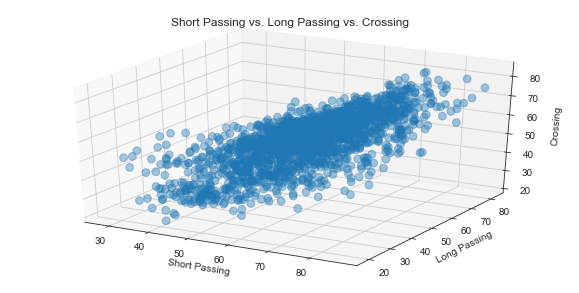

In [31]:
# It looks like there's a linear relationship between short passing and long passing as well. I want to see if 
# there's also a linear realtionship between short passing and long passing with Crossing
sns.set_style('white')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u_21['ShortPassing'], u_21['LongPassing'], u_21['Crossing'], alpha=0.4, s=60)
ax.set_xlabel('Short Passing')
ax.set_ylabel('Long Passing')
ax.set_zlabel('Crossing')
ax.set_title('Short Passing vs. Long Passing vs. Crossing')
plt.show()

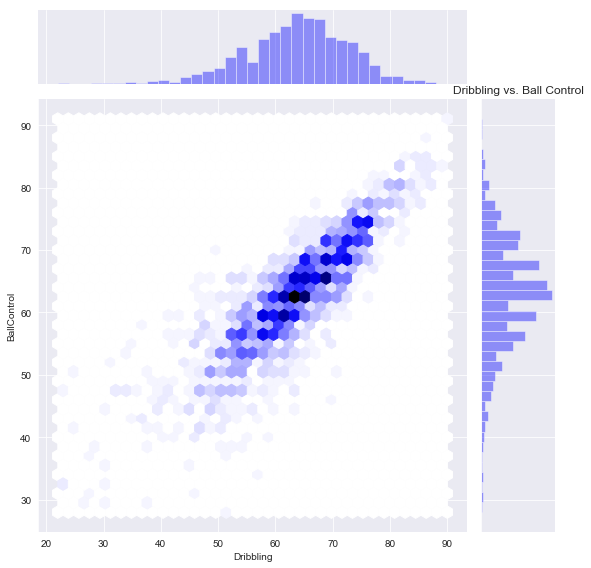

In [32]:
# I want to plot a jointplot between Dribbling and BallControl
sns.set_style('darkgrid')

sns.jointplot(x='Dribbling', y='BallControl', data=u_21, color='blue', height=8, kind='hex')
plt.title('Dribbling vs. Ball Control')
plt.show()

In [33]:
# Now I want to use plotly to plot distribution of individual position overall ratings.

import plotly
import cufflinks as cf
cf.go_offline()

u_21['ST'].iplot(kind='hist', xTitle='Striker Overall', yTitle='Count')

In [34]:
# Plotting distribution of Left and Right Wings

u_21['LW'].iplot(kind='hist', xTitle='Left / Right Wing Overall', yTitle='Count', colorscale='blues')

In [35]:
# Plotting distribution of Left / Right attacking mid Overalls

u_21['LAM'].iplot(kind='hist', xTitle='Left / Right Attacking Mid Overall', yTitle='Count', colorscale='greens')

In [36]:
# Plotting distribution of Center Backs

u_21['CB'].iplot(kind='hist', xTitle='Center Backs Overall', yTitle='Count', colorscale='reds')

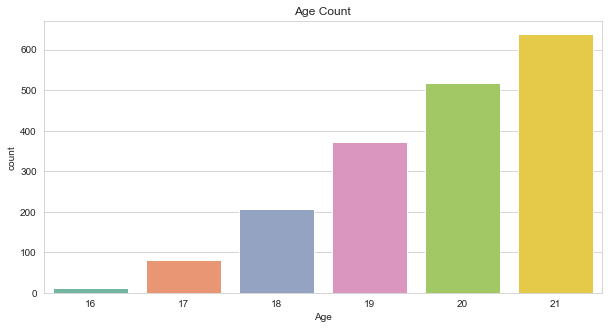

In [37]:
# I want to plot a count plot of the ages of under 21 players
sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
sns.countplot(x='Age', data=u_21, palette='Set2')
plt.title('Age Count')
plt.show()

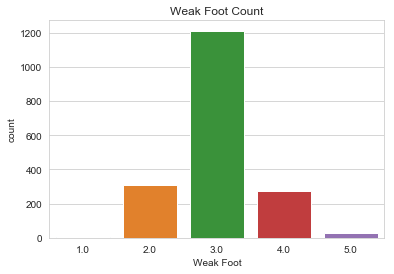

In [38]:
# Next I want to plot a countplot of weakfoot distributions

sns.countplot(x='Weak Foot', data=u_21)
plt.title('Weak Foot Count')
plt.show()

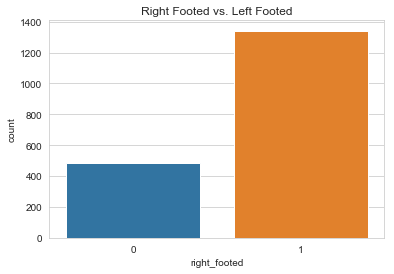

In [39]:
# I also want to see the counts of right footed vs. left footed players. 0 is lefties, 1 is righties

sns.countplot(x='right_footed', data=u_21)
plt.title('Right Footed vs. Left Footed')
plt.show()

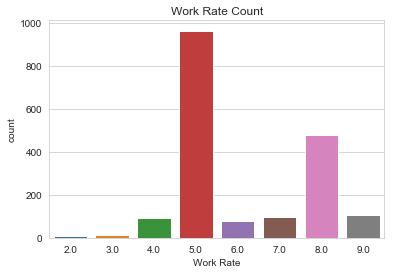

In [40]:
# I also want to see the counts of Work Rate

sns.countplot(x='Work Rate', data=u_21)
plt.title('Work Rate Count')
plt.show()

In [41]:
# Counting total left footed vs. right footed players, and percentage of righties vs. lefties

print('Total Right Footed Players: {}'.format(len(u_21[u_21['right_footed'] == 1])))
print('Percentage of Right Footed Players: {}'.format(round(100.0 * 
                                                            len(u_21[u_21['right_footed'] == 1]) / len(u_21), 2)))
print('\n')
print('Total Left Footed Players: {}'.format(len(u_21[u_21['right_footed'] == 0])))
print('Percentage of Left Footed Players: {}'.format(round(100.0 * 
                                                     len(u_21[u_21['right_footed'] == 0]) / len(u_21), 2)))

Total Right Footed Players: 1342
Percentage of Right Footed Players: 73.37


Total Left Footed Players: 487
Percentage of Left Footed Players: 26.63


In [42]:
# I want to plot the average sprint speed per position vs. the average overall per position
# First I will create new series for sprint speed and overall per position

average_position_speed = u_21.groupby('Position')['SprintSpeed'].mean().reset_index()
average_position_overall = u_21.groupby('Position')['Overall'].mean().reset_index()

/Users/alex/Library/Python/2.7/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



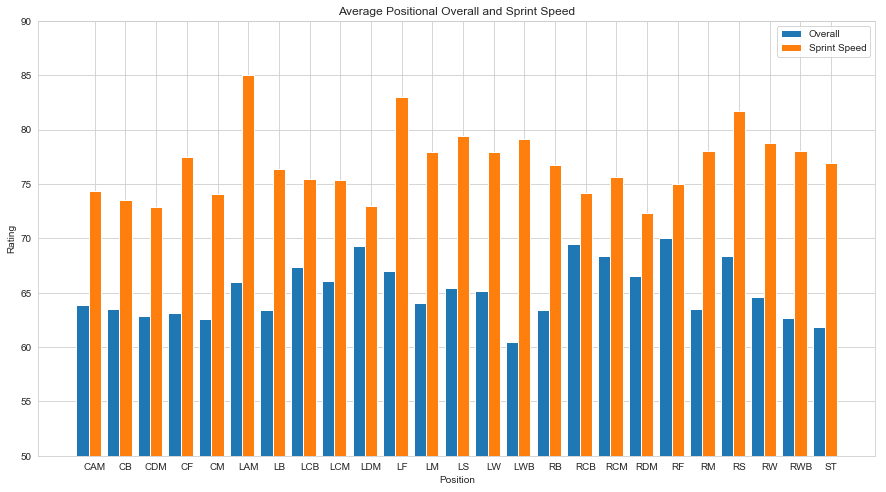

In [43]:
plt.figure(figsize=(15, 8))

n=1
t=2
d=25
w=0.8

x = [t*element + w*n for element in range(d)]

plt.bar(x, average_position_overall['Overall'], label='Overall')

# Adding the SprintSpeed averages per position side by side with the Overall bar graph

n=2
t=2
d=25
w=0.8

x = [t*element + w*n for element in range(d)]

ax = plt.subplot()
plt.bar(x, average_position_speed['SprintSpeed'], label='Sprint Speed')
ax.set_xticks(x)
ax.set_xticklabels(average_position_speed['Position'])
ax.set_xlabel('Position')
ax.set_ylabel('Rating')
plt.ylim(50, 90)
plt.legend()

plt.title('Average Positional Overall and Sprint Speed')

plt.show()

On Average it looks like LAM are our fastest players, while RF are on average the best overall players.
It also looks like on average RDM are our slowest players, while LWB on average are our worst players.

However this can be misleading depending on how many players are in each position. To combat this I want to plot a boxplot to see the distributions for each position and their Sprint Speeds / Overall.

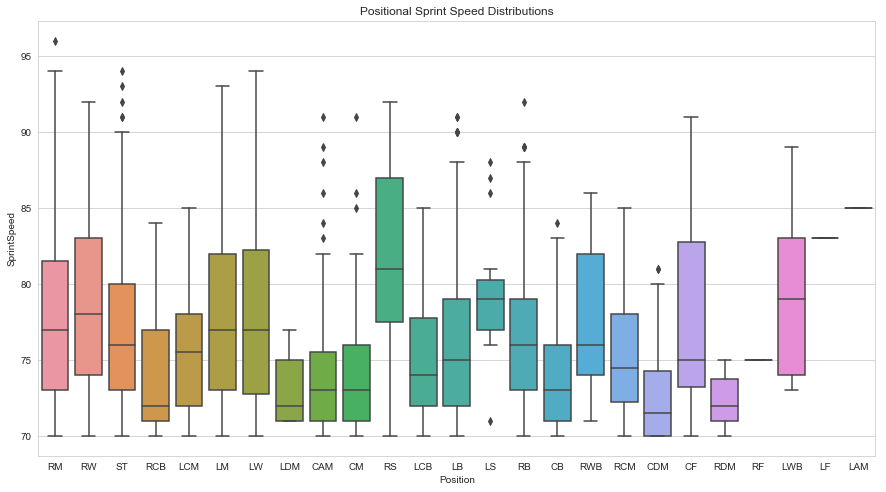

In [44]:
# Plotting box plot for Sprint Speed for each Position
plt.figure(figsize=(15, 8))

sns.boxplot(y='SprintSpeed', x='Position', data=u_21, orient='v')
plt.title('Positional Sprint Speed Distributions')
plt.show()

Text(0.5,1,'Positional Overall Distributions')

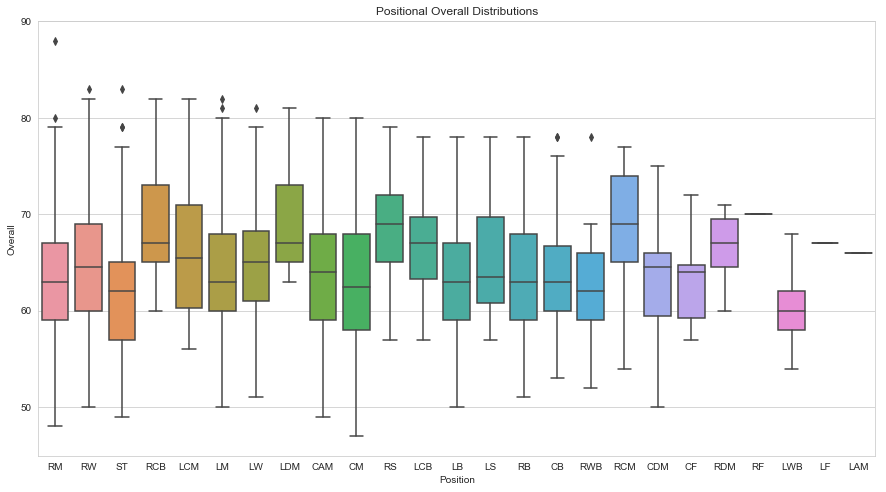

In [45]:
# Plotting box plot for Sprint Speed for each Position
plt.figure(figsize=(15, 8))

sns.boxplot(x='Position', y='Overall', data=u_21, orient='v')
plt.title('Positional Overall Distributions')

In [46]:
# Checking to see how many players are RF, LF, or LAM

print("Total RF: {}".format(len(u_21[u_21['Position'] == 'RF'])))

print("Total LF: {}".format(len(u_21[u_21['Position'] == 'LF'])))

print("Total LAM: {}".format(len(u_21[u_21['Position'] == 'LAM'])))

Total RF: 1
Total LF: 1
Total LAM: 1


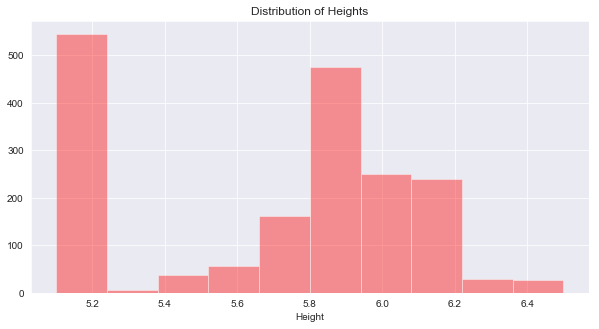

In [47]:
# Looking at the distribution of Heights
sns.set_style('darkgrid')

plt.figure(figsize=(10, 5))
sns.distplot(u_21['Height'], bins=10, kde=False, color='red')
plt.title('Distribution of Heights')
plt.show()

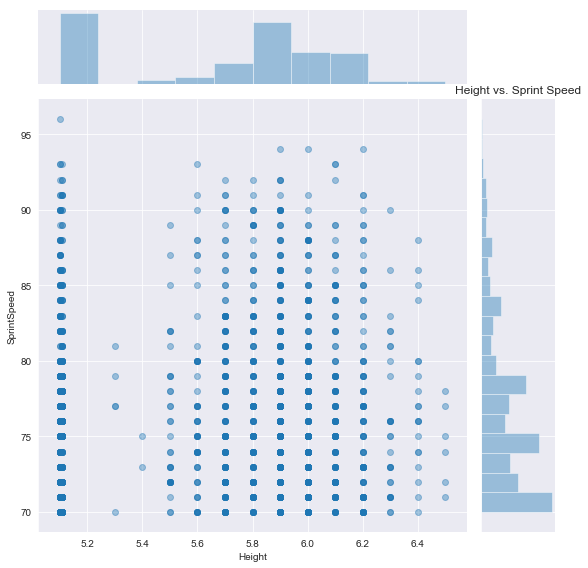

In [48]:
# I'm curious if Height has an effect on sprint speed, and if it has an effect on overall. I will plot both

sns.jointplot(x='Height', y='SprintSpeed', data=u_21, height=8, alpha=0.4)
plt.title('Height vs. Sprint Speed')
plt.show()

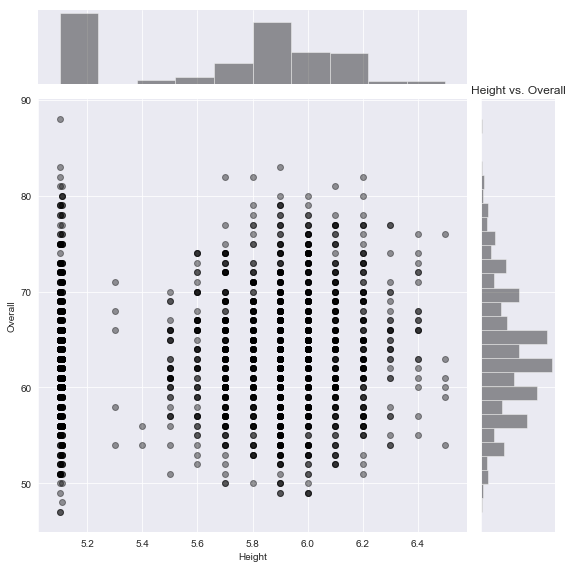

In [49]:
sns.jointplot(x='Height', y='Overall', data=u_21, height=8, alpha=0.4, color='black')
plt.title('Height vs. Overall')
plt.show()

<Figure size 864x864 with 0 Axes>

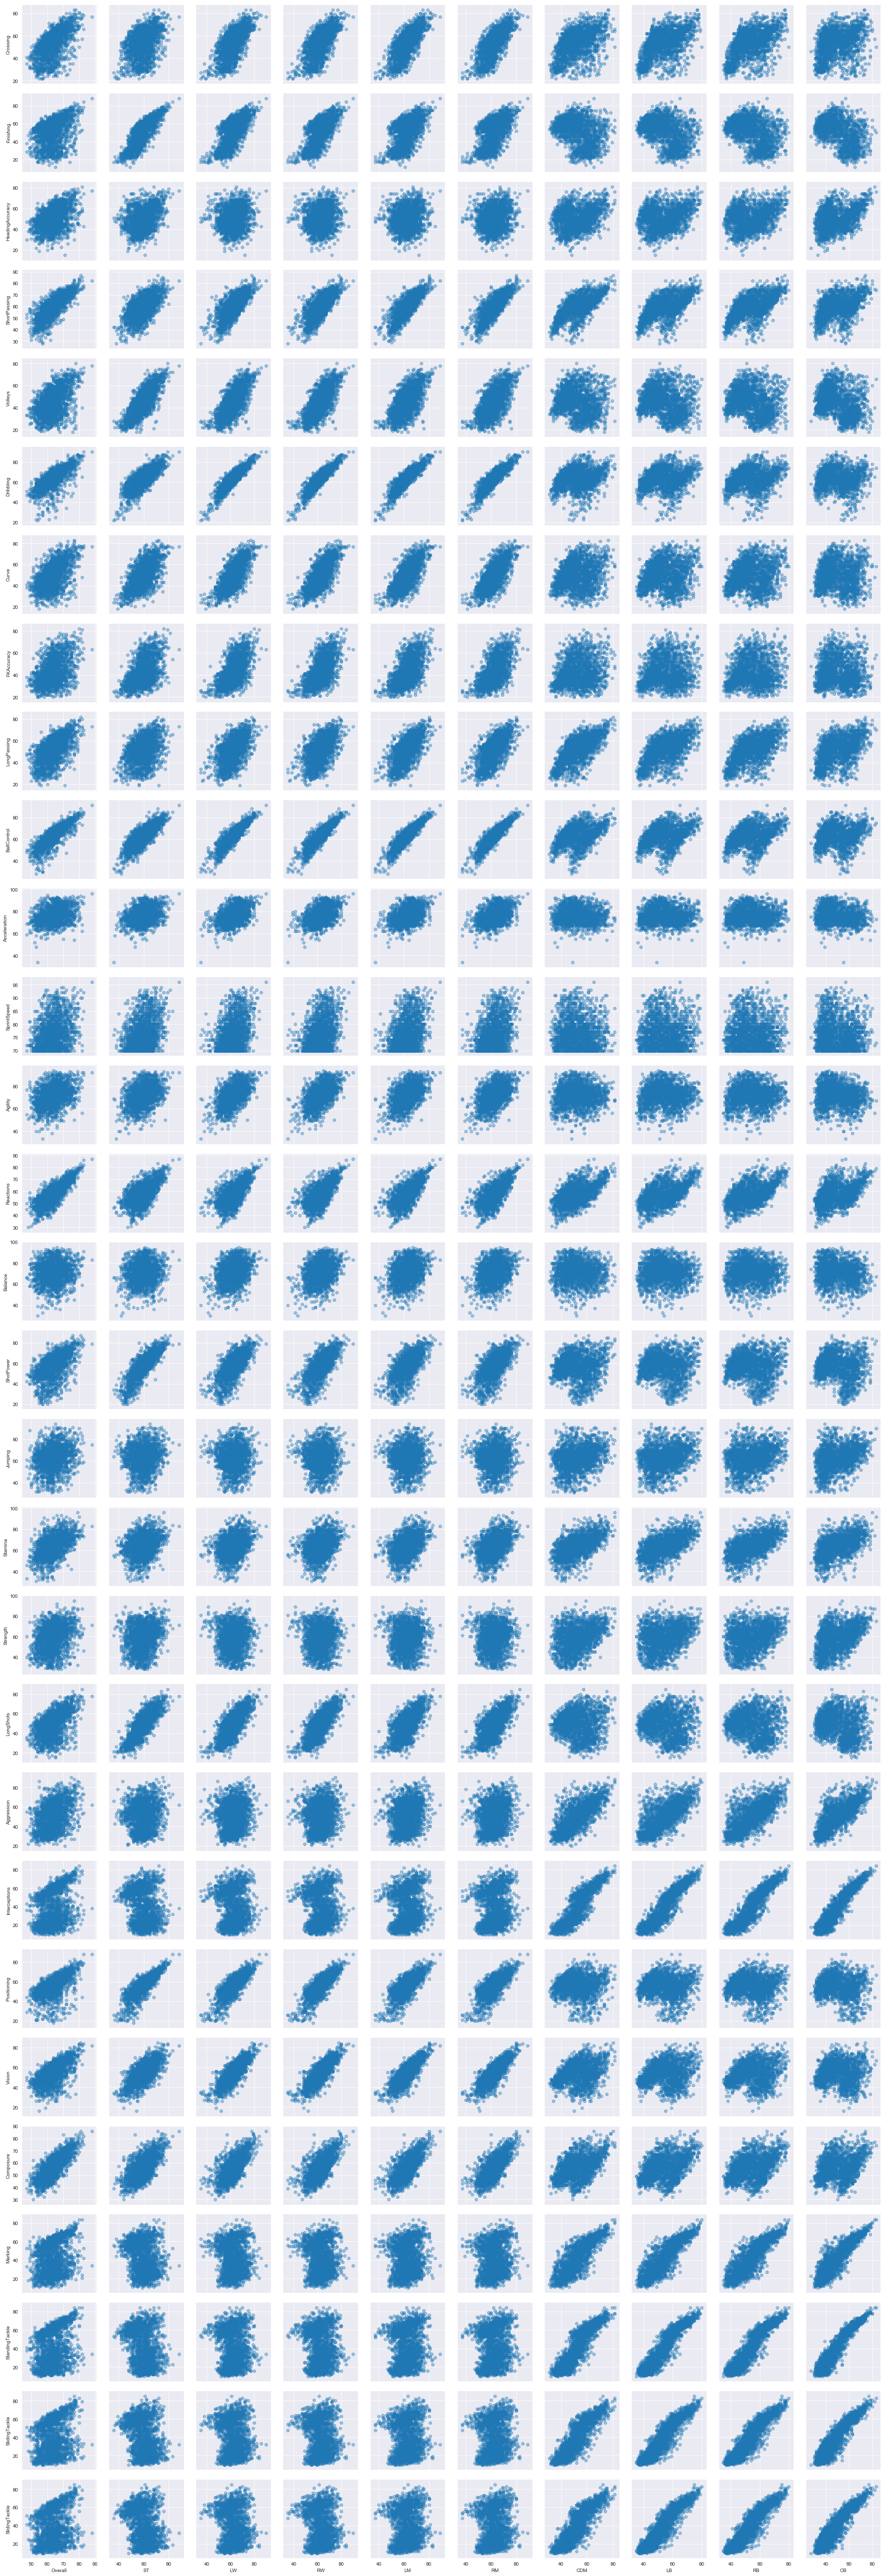

In [50]:
# Creating a Pairgrid to compare certain features with each other in one plot

plt.figure(figsize=(12, 12))

g = sns.PairGrid(u_21, x_vars=['Overall', 'ST', 'LW', 'RW', 'LM', 'RM', 'CDM', 'LB', 'RB', 'CB'],
                 y_vars=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                            'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                            'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                            'Positioning', 'Vision', 'Composure', 'Marking', 'StandingTackle',
                            'SlidingTackle', 'SlidingTackle'])
g.map(plt.scatter, alpha=0.4)
g

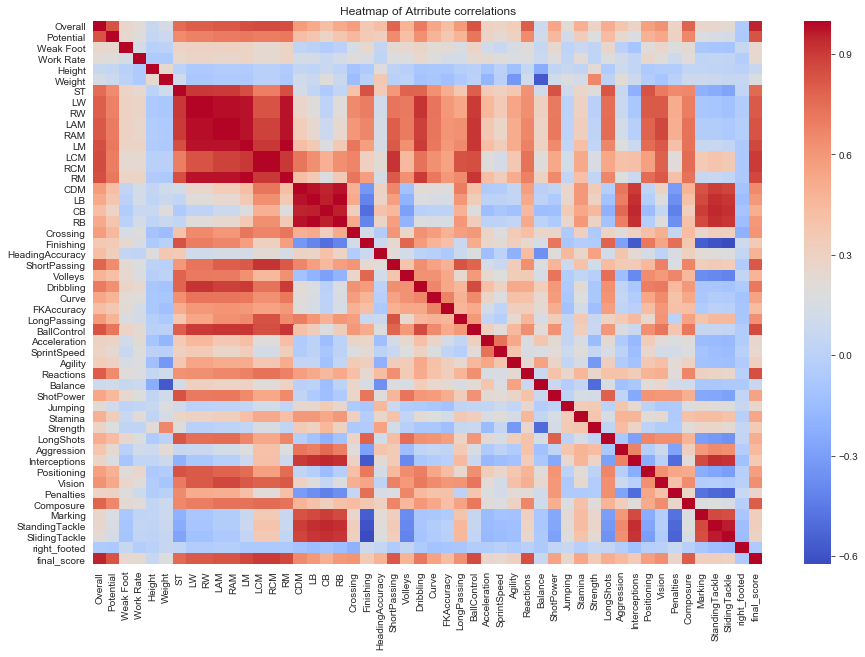

In [99]:

plt.figure(figsize=(15, 10))
sns.heatmap(u_21.drop(['ID', 'Age', 'Skill Moves',
                       'Jersey Number'], axis=1).corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap of Atrribute correlations')
plt.show()

For our defenders (CDM, RB, LB, CB) it looks like the following have a very defined linear relationship:
- Standing Tackle
- Sliding Tackle
- Marking
- Interceptions
- Strength
- Agression
- Stamina
- Reactions
- Short Passing

For our offensive players (ST, LW, RW, LAM, RAM)it looks like the following have a very defined linear relationship:
- Composure
- Vision
- Positioning
- Long Shots
- Shot Power
- Reactions
- Ball Control
- Long Passing
- Curve
- Dribbling
- Volleys
- Short Passing
- Finishing
- Crossing

## Building a Linear Regression model on the data

In [51]:
# Importing the modules I will use for the model

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [52]:
# Creating the feature variable X and label variable y for the model

X = u_21[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                            'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                            'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                            'Positioning', 'Vision', 'Composure', 'Marking', 'StandingTackle',
                            'SlidingTackle', 'SlidingTackle', 'Weak Foot', 'right_footed', 'Height', 'Weight',
         'Potential']]
y = u_21['Overall']

In [53]:
# Splitting the data into train sets and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
# Scaling and transforming the X_train features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [55]:
# Scaling the X_test features

X_test_scaled = scaler.transform(X_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [56]:
# Creating an object for the model and fitting the model

model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# Checking the r-squared for the model

model.score(X_test_scaled, y_test)

0.9179276521407032

In [58]:
# I want to test to see how well our model performs. I am going to use mean_squared_error, mean_absolute_error, and
# root_mean_squared_error

# Importing the modules

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
# Creating a new predictions variable, and then testing to see how much error there is in the model

predictions = model.predict(X_test_scaled)

In [60]:
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, predictions)))
print('\n')
print("Mean Squared Error: {}".format(mean_squared_error(y_test, predictions)))
print('\n')
print("Root Mean Sqaured Error: {}".format(np.sqrt(mean_absolute_error(y_test, predictions))))

Mean Absolute Error: 1.41084442765


Mean Squared Error: 3.26166954192


Root Mean Sqaured Error: 1.18778972367


In [61]:
X.head()

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Composure  Marking  StandingTackle  SlidingTackle  SlidingTackle  Weak Foot  right_footed  Height  Weight  Potential
25       77.0       88.0             77.0          82.0     78.0       90.0   77.0        63.0         73.0         91.0          96.0         96.0     92.0       87.0     83.0       79.0     75.0     83.0      71.0       78.0        62.0           38.0         88.0    82.0       86.0     34.0            34.0           32.0           32.0        4.0             1     5.1     161         95
155      78.0       78.0             43.0          78.0     76.0       90.0   78.0        64.0         70.0         83.0          93.0         92.0     90.0       82.0     85.0       83.0     59.0     73.0      46.0       70.0        54.0           36.0         79.0    84.0       75.0     42.0            30.0           33.0           33.0        5.0             0     5.1     148         92
156      66.0       84.0             74.0          76.0     72.0       86.0   76.0        54.0         66.0         85.0          87.0         85.0     92.0       86.0     91.0       78.0     77.0     84.0      68.0       73.0        73.0           32.0         88.0    77.0       82.0     53.0            23.0           19.0           19.0        3.0             1     5.9     161         92
226      57.0       53.0             81.0          75.0     40.0       65.0   48.0        55.0         72.0         73.0          62.0         72.0     56.0       77.0     59.0       79.0     80.0     74.0      87.0       64.0        79.0           79.0         44.0    63.0       77.0     84.0            84.0           79.0           79.0        4.0             1     6.2     196         91
228      70.0       72.0             58.0          85.0     63.0       82.0   68.0        60.0         80.0         83.0          68.0         70.0     79.0       81.0     86.0       76.0     83.0     78.0      62.0       74.0        73.0           75.0         77.0    82.0       84.0     65.0            76.0           70.0           70.0        3.0             1     5.7     161         90

The Linear Regression Model performs very well based off of the mean squared, root mean squared and absolute error values. Since an Overall rating can be anywhere from 1-99, the mean squared error is around 4%, which means on average the predictions are potentially off by 4% 

- An example to better understand - if the actual overall was 87, the model might potentially predict anywhere from 83-91 based off of the mean squared error which is still a pretty accurate description.

In [62]:
# Looking at the coefficients and bias for this model in a dataframe

weights = pd.DataFrame(model.coef_, index=X.columns).transpose()
bias = model.intercept_
weights['Bias'] = bias
weights = weights.transpose()
weights.rename(columns={0: 'Weights'}, inplace=True)

weights

Weights
Crossing          0.616981
Finishing         0.128664
HeadingAccuracy   0.666094
ShortPassing      0.783040
Volleys           0.175056
Dribbling         0.302179
Curve            -0.144066
FKAccuracy       -0.043524
LongPassing      -0.107088
BallControl       1.372999
Acceleration      0.257622
SprintSpeed       0.279148
Agility           0.011834
Reactions         1.210231
Balance          -0.061118
ShotPower         0.069966
Jumping           0.122743
Stamina           0.230262
Strength          0.266949
LongShots         0.045848
Aggression        0.051999
Interceptions     0.098279
Positioning      -0.042917
Vision           -0.058267
Composure         0.566517
Marking           0.111075
StandingTackle   -0.215310
SlidingTackle     0.162209
SlidingTackle     0.162209
Weak Foot         0.078988
right_footed     -0.052481
Height            0.078677
Weight            0.164963
Potential         1.557518
Bias             63.541406

To find our best players for each position I'm going to use the coefficients and bias for each feature and pick the players with the highest score for each position

In [63]:
# Creating an array with all of our coefficients for each feature in it

coef = model.coef_
coef

array([ 0.61698065,  0.12866389,  0.66609431,  0.78303963,  0.17505566,
        0.30217893, -0.14406603, -0.0435238 , -0.1070879 ,  1.3729986 ,
        0.25762246,  0.27914815,  0.01183405,  1.21023084, -0.06111806,
        0.06996638,  0.1227432 ,  0.23026224,  0.26694903,  0.04584844,
        0.05199875,  0.09827878, -0.04291651, -0.0582674 ,  0.56651683,
        0.11107464, -0.21530952,  0.16220945,  0.16220945,  0.07898809,
       -0.05248147,  0.07867726,  0.16496282,  1.55751848])

In [64]:
# Multiplying each row in each column by their features proper coefficient

rating = np.multiply(coef, X.values)

In [65]:
# Summing the multiplied results of features x coefficients per each row

scores = []

for i in range(len(rating)):
    row_rating = rating[i].sum()
    scores.append(row_rating)

In [66]:
# Adding the bias to each row

scores = [score + model.intercept_ for score in scores]

In [67]:
# Adding the values to the u_21 dataframe under the column name 'final_score'

u_21['final_score'] = scores

In [68]:
# Sorting the dataframe based on final score in descending order

u_21.sort_values('final_score', ascending=False, inplace=True)

In [69]:
u_21.head()

ID           Name  Age  Nationality  Overall  Potential   Value   Wage  Weak Foot  Skill Moves  Work Rate Position  Jersey Number  Height  Weight  ST  LW  RW  LAM  RAM  LM  LCM  RCM  RM  CDM  LB  CB  RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  \
25   231747      K. Mbappé   19       France       88         95    €81M  €100K        4.0          5.0        8.0       RM           10.0    5.10     161  88  90  90   89   89  89   81   81  89   65  65  57  65      77.0       88.0             77.0          82.0     78.0       90.0   77.0        63.0         73.0         91.0          96.0         96.0     92.0       87.0     83.0       79.0   
323  228702     F. de Jong   21  Netherlands       81         89    €26M   €19K        3.0          4.0        5.0      LDM            7.0    5.11     154  71  78  78   81   81  80   82   82  80   80  77  74  77      75.0       52.0             64.0          87.0     64.0       86.0   74.0        61.0         82.0         88.0          74.0         76.0     84.0       83.0     78.0       68.0   
156  230666  Gabriel Jesus   21       Brazil       83         92    €41M  €130K        3.0          4.0        9.0       ST           33.0    5.90     161  83  84  84   83   83  83   75   75  83   61  59  54  59      66.0       84.0             74.0          76.0     72.0       86.0   76.0        54.0         66.0         85.0          87.0         85.0     92.0       86.0     91.0       78.0   
414  235569    T. Ndombele   21       France       80         89  €22.5M   €51K        3.0          4.0        9.0       CM           17.0    5.11     168  74  79  79   80   80  80   80   80  80   78  75  74  75      67.0       59.0             56.0          82.0     59.0       86.0   67.0        63.0         79.0         84.0          84.0         76.0     83.0       79.0     83.0       80.0   
228  230658         Arthur   21       Brazil       82         90  €32.5M  €125K        3.0          4.0        5.0      LCM            8.0    5.70     161  75  79  79   81   81  80   82   82  80   78  75  73  75      70.0       72.0             58.0          85.0     63.0       82.0   68.0        60.0         80.0         83.0          68.0         70.0     79.0       81.0     86.0       76.0   

     Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  right_footed  final_score  
25      75.0     83.0      71.0       78.0        62.0           38.0         88.0    82.0       70.0       86.0     34.0            34.0           32.0             1   820.370871  
323     76.0     74.0      69.0       55.0        62.0           78.0         63.0    85.0       45.0       86.0     69.0            73.0           70.0             1   783.419292  
156     77.0     84.0      68.0       73.0        73.0           32.0         88.0    77.0       78.0       82.0     53.0            23.0           19.0             1   783.028907  
414     63.0     78.0      78.0       70.0        81.0           73.0         70.0    79.0       60.0       84.0     69.0            73.0           69.0             1   767.086474  
228     83.0     78.0      62.0       74.0        73.0           75.0         77.0    82.0       69.0       84.0     65.0            76.0           70.0             1   765.758151

In [70]:
# Finding our Centerbacks

center_backs = u_21[(u_21['Position'] == 'CB') | (u_21['Position'] == 'RCB') | (u_21['Position'] == 'LCB')]
center_backs = u_21[(u_21['ID'] == 235243) | (u_21['ID'] == 240130)].reset_index(drop=True)

In [71]:
# Finding the Left and Right Backs

lb = u_21[(u_21['Position'] == 'LB') | (u_21['Position'] == 'LWB')]
lb = u_21[u_21['ID'] == 235212].reset_index(drop=True)


rb = u_21[(u_21['Position'] == 'RB') | (u_21['Position'] == 'RWB')]
rb = u_21[u_21['ID'] == 231281].reset_index(drop=True)

In [72]:
# Finding the Striker

striker = u_21[(u_21['Position'] == 'ST') | (u_21['Position'] == 'RS') | (u_21['Position'] == 'LS')]

striker = u_21[u_21['ID'] == 230666].reset_index(drop=True)

In [73]:
# Finding the left and right wings

lw = u_21[(u_21['Position'] == 'LW') | (u_21['Position'] == 'LF')]
lw = u_21[u_21['ID'] == 231677].reset_index(drop=True)

rw = u_21[(u_21['Position'] == 'RW') | (u_21['Position'] == 'RF')]
rw = u_21[u_21['ID'] == 231443].reset_index(drop=True)

In [74]:
# Finding the midfielders, right, left and central defensive mid

rm = u_21[(u_21['Position'] == 'RM') | (u_21['Position'] == 'RAM')]
rm = u_21[u_21['ID'] == 231747].reset_index(drop=True)

lm = u_21[(u_21['Position'] == 'LM') | (u_21['Position'] == 'LAM')]
lm = u_21[u_21['ID'] == 229906].reset_index(drop=True)

cdm = u_21[(u_21['Position'] == 'CDM') | (u_21['Position'] == 'RDM') | (u_21['Position'] == 'LDM')]
cdm = u_21[u_21['ID'] == 228702].reset_index(drop=True)

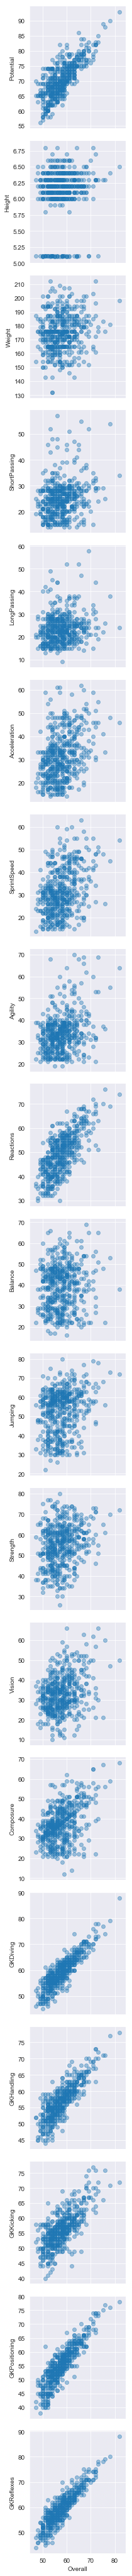

In [75]:
# Now that I have my lineup of field players, I need to find my goalkeeper. First I want to look at all
# attributes in relation to a GK Overall

g = sns.PairGrid(u_21_gk, y_vars=['Potential', 'Height', 'Weight', 'ShortPassing', 'LongPassing', 
                                'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Jumping',
                                'Strength', 'Vision', 'Composure', 'GKDiving', 'GKHandling',
                                'GKKicking', 'GKPositioning', 'GKReflexes'], x_vars=['Overall'], height=3)
g.map(plt.scatter, alpha=0.4)

In [76]:
# Creating the feature and label variables

X = u_21_gk[['Potential', 'Reactions', 'Composure', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
         'GKReflexes']]

y = u_21_gk['Overall']

In [77]:
# Creating an object for our second model

model_2 = LinearRegression()

In [78]:
# Creating train and test feature and label variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
# Scaling the train and test features

scaler_2 = StandardScaler()

X_train_scaled = scaler_2.fit_transform(X_train)

X_test_scaled = scaler_2.transform(X_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [80]:
# Fitting the model with our X_train_scaled features and y_train labels

model_2.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
# Creating our predictions based off of our model

predictions_2 = model_2.predict(X_test_scaled)

In [82]:
# Testing how accurate our model is

print('Mean Sqaured Error: {}'.format(mean_squared_error(y_test, predictions_2).round(2)))
print('\n')
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, predictions_2).round(2)))
print('\n')
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test, predictions_2)).round(2)))

Mean Sqaured Error: 0.09


Mean Absolute Error: 0.26


Root Mean Squared Error: 0.3


The model is extremely accurate with only a small margin of error

In [83]:
# Creating an array for the model's coefficients

gk_coef = model_2.coef_

In [84]:
# Multiplying our coefficients by each feature row

ratings = np.multiply(gk_coef, X.values)

In [85]:
# Summing up each row and adding them to a new list scores

scores = []

for row in ratings:
    scores.append(row.sum())

In [86]:
# Adding the bias to each score

scores = [score + model_2.intercept_ for score in scores]

In [87]:
# Adding the scores to our dataframe and then sorting by final_score in descending order

u_21_gk['final_score'] = scores
u_21_gk.sort_values('final_score', ascending=False, inplace=True)

In [88]:
gk = u_21_gk[u_21_gk['ID'] == 230621].reset_index(drop=True)

In [89]:
# Creating a dataframe with our starting lineup

final_team = data[(data['ID'] == 235243) | (data['ID'] == 240130) | (data['ID'] == 235212) | 
                 (data['ID'] == 231281) | (data['ID'] == 230666) | (data['ID'] == 231677) | 
                 (data['ID'] == 231443) | (data['ID'] == 231747) | (data['ID'] == 229906) | 
                 (data['ID'] == 228702) | (data['ID'] == 230621)]

final_team.drop(['Unnamed: 0', 'Photo', 'Nationality', 'Flag', 'Club Logo', 'Joined', 'Loaned From'], axis=1,
               inplace=True)

In [90]:
final_team

ID                 Name  Age  Overall  Potential                 Club   Value   Wage  Special Preferred Foot  International Reputation  Weak Foot  Skill Moves       Work Rate Body Type Real Face Position  Jersey Number Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB  \
25   231747            K. Mbappé   19       88         95  Paris Saint-Germain    €81M  €100K     2118          Right                       3.0        4.0          5.0    High/ Medium      Lean       Yes       RM           10.0                 2022   5'10  161lbs  85+3  85+3  85+3  87+3  87+3  87+3  87+3  87+3  86+3  86+3  86+3  86+3  78+3  78+3  78+3  86+3  66+3  62+3  62+3  62+3  66+3  62+3   
155  231443           O. Dembélé   21       83         92         FC Barcelona    €40M  €155K     1993           Left                       3.0        5.0          4.0       High/ Low      Lean       Yes       RW           11.0                 2022   5'10  148lbs  76+3  76+3  76+3  83+3  82+3  82+3  82+3  83+3  82+3  82+3  82+3  82+3  74+3  74+3  74+3  82+3  63+3  58+3  58+3  58+3  63+3  59+3   
156  230666        Gabriel Jesus   21       83         92      Manchester City    €41M  €130K     2051          Right                       2.0        3.0          4.0      High/ High    Normal       Yes       ST           33.0                 2023    5'9  161lbs  81+2  81+2  81+2  82+2  83+2  83+2  83+2  82+2  81+2  81+2  81+2  81+2  73+2  73+2  73+2  81+2  61+2  59+2  59+2  59+2  61+2  57+2   
226  235243           M. de Ligt   18       82         91                 Ajax    €27M   €11K     1937          Right                       2.0        4.0          2.0  Medium/ Medium    Normal       Yes      RCB            3.0                 2021    6'2  196lbs  66+2  66+2  66+2  63+2  65+2  65+2  65+2  63+2  65+2  65+2  65+2  65+2  70+2  70+2  70+2  65+2  73+2  77+2  77+2  77+2  73+2  75+2   
229  230621        G. Donnarumma   19       82         93                Milan    €29M   €23K     1278          Right                       3.0        3.0          1.0  Medium/ Medium    Normal       Yes       GK           22.0                 2021    6'5  198lbs   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
319  231677          M. Rashford   20       81         89    Manchester United    €27M  €110K     2062          Right                       2.0        4.0          4.0    High/ Medium      Lean       Yes       LW           11.0                 2020    6'1  154lbs  79+2  79+2  79+2  80+2  80+2  80+2  80+2  80+2  78+2  78+2  78+2  79+2  72+2  72+2  72+2  79+2  63+2  59+2  59+2  59+2  63+2  60+2   
321  229906            L. Bailey   20       81         89  Bayer 04 Leverkusen  €26.5M   €54K     2011           Left                       1.0        4.0          4.0    High/ Medium    Normal        No       LM            9.0                 2023   5'10  174lbs  76+2  76+2  76+2  81+2  80+2  80+2  80+2  81+2  79+2  79+2  79+2  80+2  71+2  71+2  71+2  80+2  59+2  54+2  54+2  54+2  59+2  55+2   
323  228702           F. de Jong   21       81         89                 Ajax    €26M   €19K     2064          Right                       1.0        3.0          4.0  Medium/ Medium      Lean        No      LDM            7.0                 2022   5'11  154lbs  69+2  69+2  69+2  76+2  75+2  75+2  75+2  76+2  79+2  79+2  79+2  78+2  80+2  80+2  80+2  78+2  77+2  78+2  78+2  78+2  77+2  75+2   
727  240130         Éder Militão   20       78         87             FC Porto    €14M   €10K     1946          Right                       1.0        2.0          2.0    Medium/ High      Lean        No      LCB            3.0                 2023    6'1  174lbs  63+2  63+2  63+2  66+2  64+2  64+2  64+2  66+2  64+2  64+2  64+2  68+2  66+2  66+2  66+2  68+2  75+2  73+2  73+2  73+2  75+2  76+2   
730  235212        